In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [8]:
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file)
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_= 'audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')
        critic_score = soup.find('div', class_='critic-score meter').find_all('span')
        critic_score = critic_score[-1].contents[0]

        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'critic_score' : int(critic_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'critic_score','number_of_audience_ratings'])
df

,title,audience_score,critic_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,100,103672
1,The 39 Steps (1935),86,98,23647
2,The Adventures of Robin Hood (1938),89,100,33584
3,All About Eve (1950),94,100,44564
4,All Quiet on the Western Front (1930),89,100,17768
...,...,...,...,...
95,Up (2009),90,98,1201878
96,Vertigo (1958),93,97,101454
97,The Wages of Fear (1953),95,100,8536
98,Wonder Woman (2017),90,92,112955


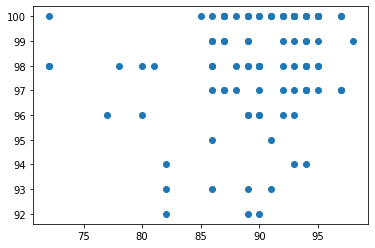

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.audience_score, df.critic_score)